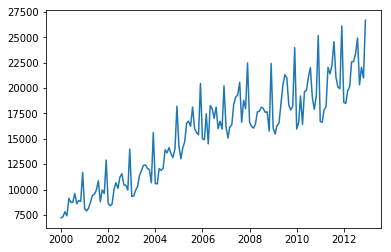

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
ts = pd.read_csv("D:\\Courses\\M2 UTC\\First trimester\\AOS1\\Chapter4_time_series\\TP series\\data\\debitcards.csv", parse_dates=True, index_col=0)
assert(ts.shape == (156, 1))
assert(type(ts.index) is pd.core.indexes.datetimes.DatetimeIndex)
plt.plot(ts)
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(ts.V1, autolag='AIC')
pvalue = test[1]
print(pvalue)
# time series shows some linear trend 
# p = 0.788, the null hypothesis is important
# we can conclude the data is not stationary

0.7881064417185544


In [19]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pmdarima as pm
ts_train = ts[:"1-1-2008"]
ts_test = ts["1-1-2008":]
#building the model
from pyramid.arima import auto_arima
model =  pm.auto_arima(ts_train, start_p=1, start_q=1,
                           max_p=5, max_q=5,m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print("the best model that we found is:",model)
model_fit = model.fit(ts_train)

forecast,conf_int = model_fit.predict(n_periods=len(ts_test),return_conf_int=True)
forecast = pd.DataFrame(forecast,index = ts_test.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1380.453, BIC=1392.607, Fit time=0.561 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1413.987, BIC=1418.848, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1391.118, BIC=1400.841, Fit time=0.251 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1378.626, BIC=1388.349, Fit time=0.454 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1380.617, BIC=1392.771, Fit time=0.700 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1385.444, BIC=1392.736, Fit time=0.078 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1380.618, BIC=1392.772, Fit time=1.214 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1382.595, BIC=1397.180, Fit time=2.469 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1407.773, BIC=1415.065, Fit time=0.231 seconds
Fit ARIMA: order=(0, 1, 2) s

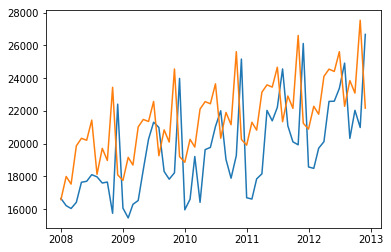

In [20]:
#plot the predictions for validation set
plt.plot(ts_test, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

In [21]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(ts_test,forecast))
print(rms)

3468.8986455566724


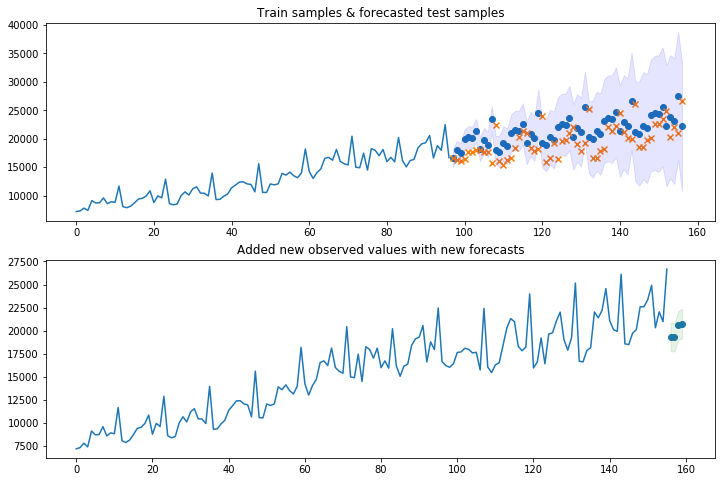

the values predicted for the next 4 months are: [19347.69593271 19284.32178298 20565.93853624 20781.52568112]


In [22]:
preds, conf_int = model_fit.predict(n_periods=ts_test.shape[0],
                                return_conf_int=True)
# Usual Differencing
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
x_axis = np.arange(ts_train.shape[0] + preds.shape[0])
axes[0].plot(x_axis[:ts_train.shape[0]], ts_train)
axes[0].scatter(x_axis[ts_train.shape[0]:], preds,  marker='o')
axes[0].scatter(x_axis[ts_train.shape[0]:], ts_test,  marker='x')
axes[0].fill_between(x_axis[-preds.shape[0]:], conf_int[:, 0], conf_int[:, 1],
                     alpha=0.1, color='b')

# fill the section where we "held out" samples in our model fit

axes[0].set_title("Train samples & forecasted test samples")

# add the actual samples to the model and create NEW forecasts
model_fit.update(ts_test)
new_preds, new_conf_int = model_fit.predict(n_periods=4, return_conf_int=True)
new_x_axis = np.arange(ts.shape[0] + 4)

axes[1].plot(new_x_axis[:ts.shape[0]], ts)
axes[1].scatter(new_x_axis[ts.shape[0]:], new_preds,  marker='o')
axes[1].fill_between(new_x_axis[-new_preds.shape[0]:],
                     new_conf_int[:, 0],
                     new_conf_int[:, 1],
                     alpha=0.1, color='g')
axes[1].set_title("Added new observed values with new forecasts")
plt.show()
print("the values predicted for the next 4 months are:",new_preds)